# What is Deep Learning?
Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.

<figure>
<img src="AI-ML-DL.svg" width="300"/>
</figure>

<figure>
<img src="Stars.png" width="300"/>
</figure>

__Machine learning:__ An engineer with knowledge of both the model and the subject being classified manually selects which features the ML algorithm will use as a decision boundary. The algorithm then searches for these set features and uses them to classify data.

<figure>
<img src="Machine Learning Process.png" width="700"/>
</figure>

__Deep learning:__ is a subset of ML that determines target features automatically, without the aid of a human engineer.
it's a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. This speeds up results as the algorithm can find and select features faster than a human can.


<figure>
<img src="Deep Learning Process.png" width="700"/>
</figure>

<figure>
<img src="Cat.png" width="700"/>
</figure>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

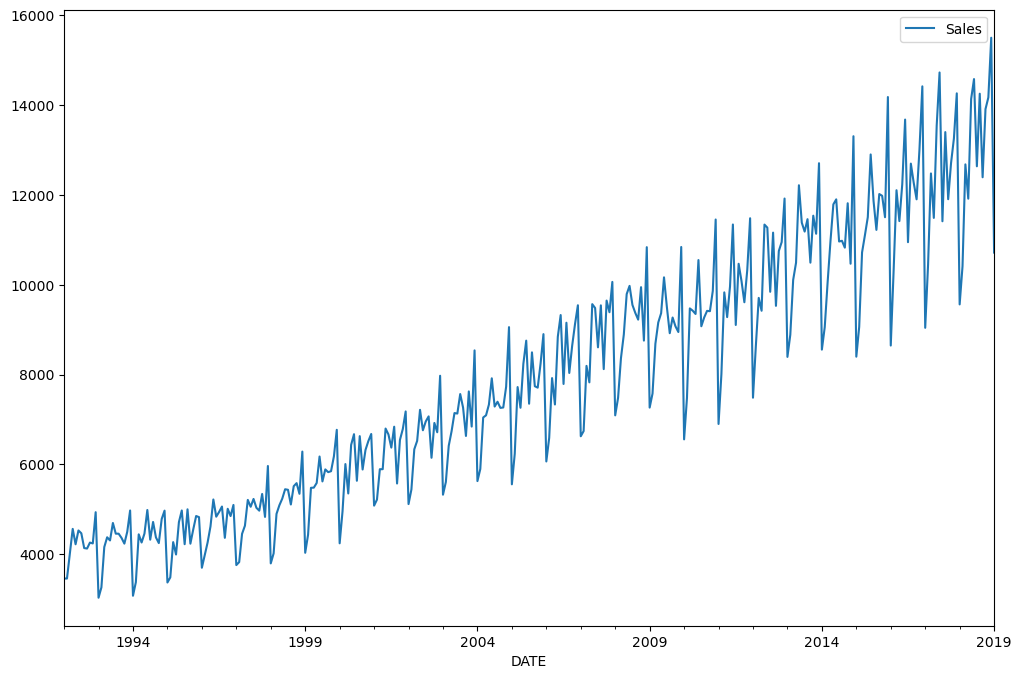

In [5]:
df.plot(figsize=(12,8))

## Train Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [6]:
len(df)

325

In [7]:
325-12

313

In [8]:
train = df.iloc[:313]
test = df.iloc[313:]

In [9]:
len(test)

12

## Scale Data
If the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [13]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [16]:
# Let's define to get 12 months back and then predict the next month out
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
# What does the first batch look like?
X,y = generator[0]

In [18]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### Create the Model

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [45]:
# define model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(LSTM(8, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 16)            1152      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit model
model.fit_generator(generator,epochs=40)

Epoch 1/40


C:\Users\armen\AppData\Local\Temp\ipykernel_9848\1584785001.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=40)


301/301 [==============================] - 11s 15ms/step - loss: 0.0461
Epoch 2/40
301/301 [==============================] - 5s 15ms/step - loss: 0.0095
Epoch 3/40
301/301 [==============================] - 4s 14ms/step - loss: 0.0090
Epoch 4/40
301/301 [==============================] - 4s 15ms/step - loss: 0.0098
Epoch 5/40
301/301 [==============================] - 4s 14ms/step - loss: 0.0088
Epoch 6/40
301/301 [==============================] - 4s 14ms/step - loss: 0.0081
Epoch 7/40
301/301 [==============================] - 4s 14ms/step - loss: 0.0078
Epoch 8/40
301/301 [==============================] - 4s 15ms/step - loss: 0.0083
Epoch 9/40
301/301 [==============================] - 4s 14ms/step - loss: 0.0073
Epoch 10/40
301/301 [==============================] - 4s 15ms/step - loss: 0.0076
Epoch 11/40
301/301 [==============================] - 4s 15ms/step - loss: 0.0071
Epoch 12/40
301/301 [==============================] - 4s 15ms/step - loss: 0.0067
Epoch 13/40
301/301 [==

In [50]:
model.history.history.keys()

dict_keys(['loss'])

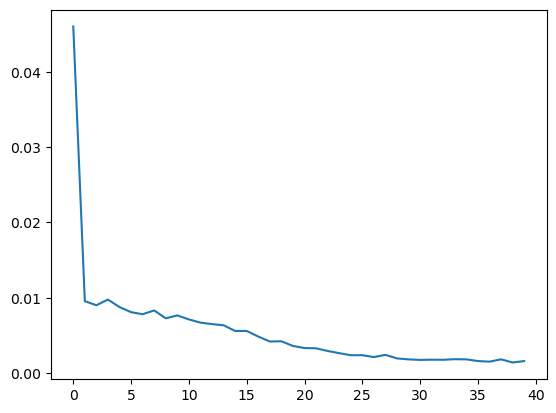

In [51]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [52]:
first_eval_batch = scaled_train[-12:]

In [53]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [54]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [55]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 460ms/step


array([[0.6756455]], dtype=float32)

In [56]:
scaled_test[0]

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [58]:
current_batch.shape

(1, 12, 1)

In [59]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [60]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [61]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 36ms/step


In [62]:
test_predictions

[array([0.6756455], dtype=float32),
 array([0.83727837], dtype=float32),
 array([0.7613673], dtype=float32),
 array([0.9314361], dtype=float32),
 array([1.0219464], dtype=float32),
 array([0.75463396], dtype=float32),
 array([0.9175594], dtype=float32),
 array([0.7936733], dtype=float32),
 array([0.86140984], dtype=float32),
 array([0.90381634], dtype=float32),
 array([0.9775227], dtype=float32),
 array([0.6006615], dtype=float32)]

In [63]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [64]:
true_predictions = scaler.inverse_transform(test_predictions)

In [65]:
true_predictions

array([[10935.37636077],
       [12826.31960487],
       [11938.23628855],
       [13927.871185  ],
       [14986.75128698],
       [11859.4627344 ],
       [13765.52724862],
       [12316.18366647],
       [13108.63375288],
       [13604.7473892 ],
       [14467.03773063],
       [10058.1390779 ]])

In [66]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11512.034731
2018-03-01,12683,13272.090604
2018-04-01,11919,12702.671058
2018-05-01,14138,14494.698114
2018-06-01,14583,15479.673314
2018-07-01,12640,12515.859742
2018-08-01,14257,14257.849585
2018-09-01,12396,12587.855397
2018-10-01,13914,13520.688887


In [67]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\armen\AppData\Local\Temp\ipykernel_9848\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [68]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,10935.376361
2018-03-01,12683,12826.319605
2018-04-01,11919,11938.236289
2018-05-01,14138,13927.871185
2018-06-01,14583,14986.751287
2018-07-01,12640,11859.462734
2018-08-01,14257,13765.527249
2018-09-01,12396,12316.183666
2018-10-01,13914,13108.633753


<AxesSubplot:xlabel='DATE'>

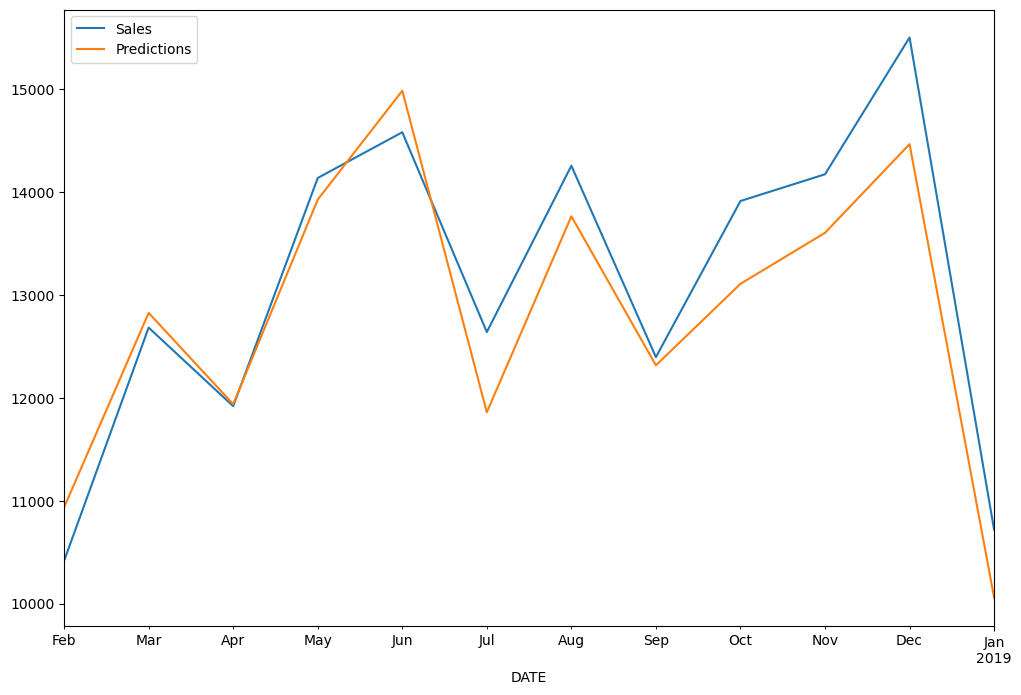

In [69]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [54]:
model.save('my_rnn_model.h5')

## load a model

In [55]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [56]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
